In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 uninstall tensorflow

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0


In [ ]:
#installed v2.1.0 so my model will confom with the version tensorflow in my pc
!pip3 install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 40.1MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 450kB 50.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=6dcf627b89fa462730a9aec9a35d488ba434456c7cce4b10aba3b2b5905e4271
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
img_array = plt.imread('/content/drive/MyDrive/test_dataset/closed/s0001_01297_0_1_0_2_0_01.png', cv2.IMREAD_GRAYSCALE)

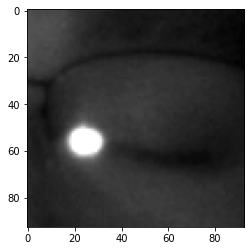

In [ ]:
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

(93, 93)

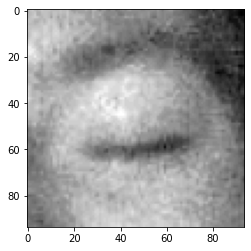

In [ ]:
datadirectory = '/content/drive/MyDrive/test_dataset'
Classes = ['closed', 'open']
for category in Classes:
    path = os.path.join(datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
        

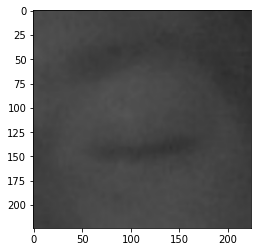

In [ ]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def train_data():
    for category in Classes:
        path = os.path.join(datadirectory, category)
        
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [ ]:
train_data()

In [ ]:
print(len(training_data))

3284


In [ ]:
import random
random.seed(42)
random.shuffle(training_data)

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 224, 224, 3)

In [ ]:
X.shape

(3284, 224, 224, 3)

In [ ]:

X = X/255.0;

In [ ]:
y = np.array(y)

In [ ]:
#added random seed so no need for pickel
import pickle

pickle_out = open('X.picklE', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open('X.picklE', 'rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

# using transfer learnin

In [ ]:
#put noise here leraaa
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [ ]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
#settings for binary classification

In [ ]:
new_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
new_model.fit(X, y, epochs = 10,validation_split = 0.1) #yikes! increase epochs to improvee accuracy

Train on 2955 samples, validate on 329 samples
Epoch 1/10
2955/2955 [==============================] - 29s 10ms/sample - loss: 0.0712 - accuracy: 0.9807 - val_loss: 18.6271 - val_accuracy: 0.4833
Epoch 2/10
2955/2955 [==============================] - 18s 6ms/sample - loss: 0.0243 - accuracy: 0.9926 - val_loss: 2.3137 - val_accuracy: 0.6748
Epoch 3/10
2955/2955 [==============================] - 18s 6ms/sample - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.0523 - val_accuracy: 0.9878
Epoch 4/10
2955/2955 [==============================] - 18s 6ms/sample - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.0183 - val_accuracy: 0.9970
Epoch 5/10
2955/2955 [==============================] - 18s 6ms/sample - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/10
2955/2955 [==============================] - 18s 6ms/sample - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0121 - val_accuracy: 0.9909
Epoch 7/10
2955/2955 [==============================] - 18s 6ms/sampl

In [ ]:
new_model.save('Beta_model.h5')


In [ ]:
img_array = cv2.imread('/content/drive/MyDrive/test_dataset/open/s0012_06729_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [ ]:
X_input = np.array(new_array).reshape(1, 224, 224, 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

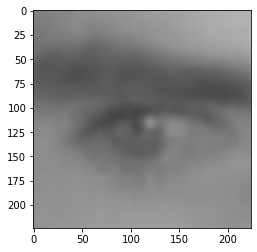

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input= X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

array([[1.]], dtype=float32)

In [ ]:
img_array = cv2.imread('/content/drive/MyDrive/test_dataset/closed/s0001_01298_0_1_0_2_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

X_input = np.array(new_array).reshape(1, 224, 224, 3)
X_input.shape


(1, 224, 224, 3)

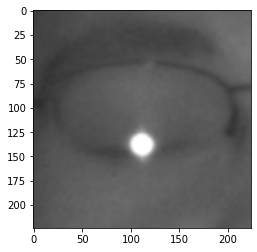

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input= X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

array([[1.5996958e-06]], dtype=float32)

In [ ]:
#yayyyyyyy!

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/nice_model (1).h5')

In [ ]:
#checking the unkown images

In [ ]:
img = cv2.imread('/content/download (4).jfif')

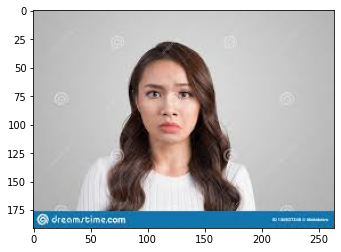

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

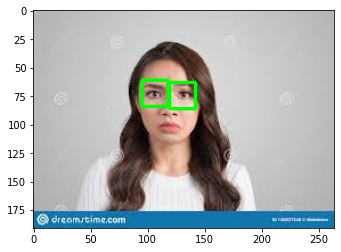

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#extract eyes

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  if len(eyes)==0:
    print('eyes are not detected')
  else:
    for (ex,ey,ew,eh)in eyes:
      eyes_roi = roi_color[ey: ey+eh, ex:ex +ew]

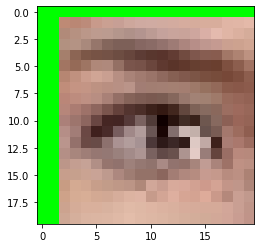

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(20, 20, 3)

In [ ]:
final_img = cv2.resize(eyes_roi, (224, 224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/225.0

In [ ]:
final_img.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict(final_img)

array([[1.]], dtype=float32)

## Detection time 

In [ ]:
from IPython.display import Audio
sound_file = 'https://www.soundjay.com/button/beep-01a.mp3'
Audio(sound_file, autoplay=True)

In [1]:
from IPython.display import Audio
sound_file = 'https://www.soundjay.com/button/beep-01a.mp3'
Audio(sound_file, autoplay=True)
Frequency = 2500
duration= 1000
import numpy as np

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError('cant open webcam')

while True:
  ret,frame = cap.read()
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #print(faceCascade.empty())
  eyes = eye_cascade.detectMultiScale(gray, 1.1,4)
  for x, y, w, h, in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    eyes = eye_cascade.detectMultiScale(roi_gray)
  if len(eyes)==0:
    print('eyes are not detected')
  else:
    for (ex,ey,ew,eh)in eyes:
      eyes_roi = roi_color[ey: ey+eh, ex:ex +ew]

  final_img = cv2.resize(eyes_roi, (224, 224))
  final_img = np.expand_dims(final_img, axis=0)
  final_img = final_img/225.0

  prediction = new_model.predict(final_img)
  if (prediction>0):
    status = "open eyes"
    cv2.putText(frame,
                status,
                (150, 150)
                font, 3,
                (0, 255, 0),
                2,
                cv2.LINE_4)
    x1,y1,w1,h1 = 0,0,175,75
    #rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), 1)
    cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)

  else:
    counter = counter +1
    status = 'closed eyes'
    cv2.putText(frame,
                status,
                (150, 150)
                font, 3,
                (0, 255, 0),
                2,
                cv2.LINE_4)
    x1,y1,w1,h1 = 0,0,175,175
    #rectangle
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255), 2)
    if counter >5:

      x1, y1, w1, h1, = 0,0,175,75
    #rectangle
      cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), 1)
      cv2.putText(frame, 'sleep alert !!', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)  
      soun_file.Beep(frequency, duration)
      counter = 0

  cv2.imshow('drows', frame)

  if cv2.waitkey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllindows()



OSError: ignored